<a href="https://colab.research.google.com/github/na-learning/ML-EDA/blob/main/exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the yellow_tripdata_2022-01.parquet file into Pandas.
2. Print the first 5 rows of data. Study the schema and make sure you understand what each of the fields mean by referencing the documentation.
3. How many rows are in the dataset? How many unique columns are in the dataset?
4. Which columns have NULL values and how many NULL values are present in each of these columns?
5. Generate summary statistics using Pandas' describe method. Do you notice anything unusual in the dataset? Find at least one anomoly and try to come up with a hypothesis to explain it.
6. Drop all rows with NULL values and store the result. We'll ignore NULL valued rows in this mini-project.

In [ ]:

# Load parquet file into a Pandas DataFrame
yellow_trip_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet', engine='pyarrow')

In [ ]:
# Display the first few rows of the dataset
print(yellow_trip_df.head(5))

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3         2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4         2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.80         1.0                  N           142           236   
1           2.10         1.0                  N           236            42   
2           0.97         1.0                  N           166           166   
3           1.09         1.0                  N           114            68   
4           4.30         1.0                  N            68           163   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


In [ ]:
# Display the shape of the dataset
print(yellow_trip_df.shape)

(2463931, 19)


In [ ]:
# Check for missing values

# Columns having null values
null_cols = yellow_trip_df.columns[yellow_trip_df.isnull().any()]
print(null_cols)

# Count of null values by column
print(yellow_trip_df[null_cols].isnull().sum())

Index(['passenger_count', 'RatecodeID', 'store_and_fwd_flag',
       'congestion_surcharge', 'airport_fee'],
      dtype='object')
passenger_count         71503
RatecodeID              71503
store_and_fwd_flag      71503
congestion_surcharge    71503
airport_fee             71503
dtype: int64


In [ ]:
# Summary statistics of the dataset
print(yellow_trip_df.describe())

           VendorID  passenger_count  trip_distance    RatecodeID  \
count  2.463931e+06     2.392428e+06   2.463931e+06  2.392428e+06   
mean   1.707819e+00     1.389453e+00   5.372751e+00  1.415507e+00   
std    5.021375e-01     9.829686e-01   5.478714e+02  5.917573e+00   
min    1.000000e+00     0.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.040000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.740000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.130000e+00  1.000000e+00   
max    6.000000e+00     9.000000e+00   3.061593e+05  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  2.463931e+06  2.463931e+06  2.463931e+06  2.463931e+06  2.463931e+06   
mean   1.660768e+02  1.635807e+02  1.194449e+00  1.294648e+01  1.006710e+00   
std    6.546806e+01  7.079016e+01  5.001778e-01  2.558149e+02  1.236226e+00   
min    1.000000e+00  1.000000e+00  0.000000e+00 -4.800000e+02 

In [ ]:
# Drop rows with missing values.
yellow_trip_df = yellow_trip_df.dropna(axis=0)
print(yellow_trip_df.shape)

(2392428, 19)


In [ ]:
# Create a new column for trip duration in minutes
col = yellow_trip_df.apply(lambda row: ((row.tpep_dropoff_datetime - row.tpep_pickup_datetime).seconds)/60, axis=1)
yellow_trip_df = yellow_trip_df.assign(trip_duration_mins=col.values)
print(yellow_trip_df.head(5))

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3         2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4         2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.80         1.0                  N           142           236   
1           2.10         1.0                  N           236            42   
2           0.97         1.0                  N           166           166   
3           1.09         1.0                  N           114            68   
4           4.30         1.0                  N            68           163   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


In [ ]:
# Create new columns for pickup hour and day of week
yellow_trip_df['pickup_day_of_week'] = yellow_trip_df.apply(lambda row: row.tpep_pickup_datetime.strftime('%A'), axis=1)
yellow_trip_df['pickup_hour'] = yellow_trip_df.apply(lambda row: row.tpep_pickup_datetime.hour, axis=1)
print(yellow_trip_df.head(5))

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3         2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4         2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.80         1.0                  N           142           236   
1           2.10         1.0                  N           236            42   
2           0.97         1.0                  N           166           166   
3           1.09         1.0                  N           114            68   
4           4.30         1.0                  N            68           163   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1

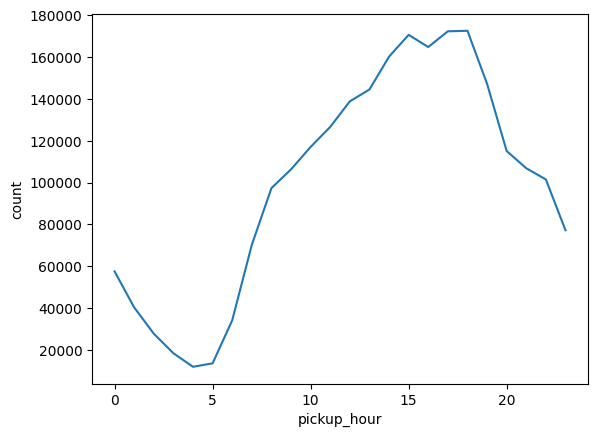

In [ ]:
# Create a lineplot displaying the number of trips by pickup hour
import seaborn as sns
import matplotlib.pyplot as plt

data_df = yellow_trip_df.groupby('pickup_hour')['pickup_hour'].count().to_frame(name="count")

sns.lineplot(x="pickup_hour", y="count", data=data_df)
plt.show()

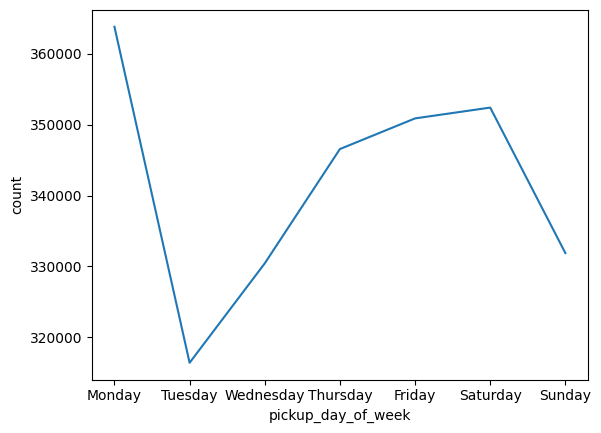

In [ ]:
# Create a lineplot displaying the number of trips by pickup day
data_df = yellow_trip_df.groupby('pickup_day_of_week')['pickup_day_of_week'].count().to_frame(name="count")
sort_dict = {'Monday':0,
              'Tuesday':1,
              'Wednesday':2,
              'Thursday':3,
              'Friday':4,
              'Saturday':5,
              'Sunday':6,
              }
data_df = data_df.sort_values(by=['pickup_day_of_week'], key=lambda x: x.map(sort_dict))

sns.lineplot(x="pickup_day_of_week", y="count", data=data_df)
plt.show()


In [ ]:
# Compute correlation matrix of numerical variables

corr = yellow_trip_df[['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration_mins']].corr()
corr

,trip_distance,fare_amount,tip_amount,total_amount,trip_duration_mins
trip_distance,1.000000,0.039426,0.491978,0.048724,0.169265
fare_amount,0.039426,1.000000,0.024196,0.999878,0.008299
tip_amount,0.491978,0.024196,1.000000,0.038133,0.088311
total_amount,0.048724,0.999878,0.038133,1.000000,0.009920
trip_duration_mins,0.169265,0.008299,0.088311,0.009920,1.000000


<Axes: >

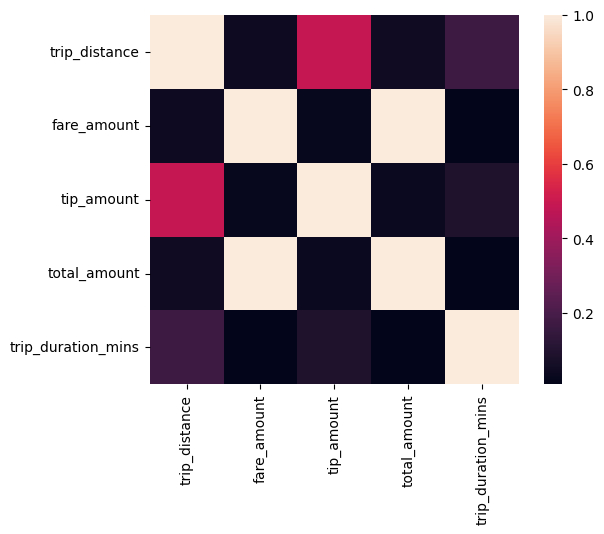

In [ ]:
# Create a heatmap of the correlation matrix
sns.heatmap(corr, square=True)

# fare_amount and total_amount strongly correlated

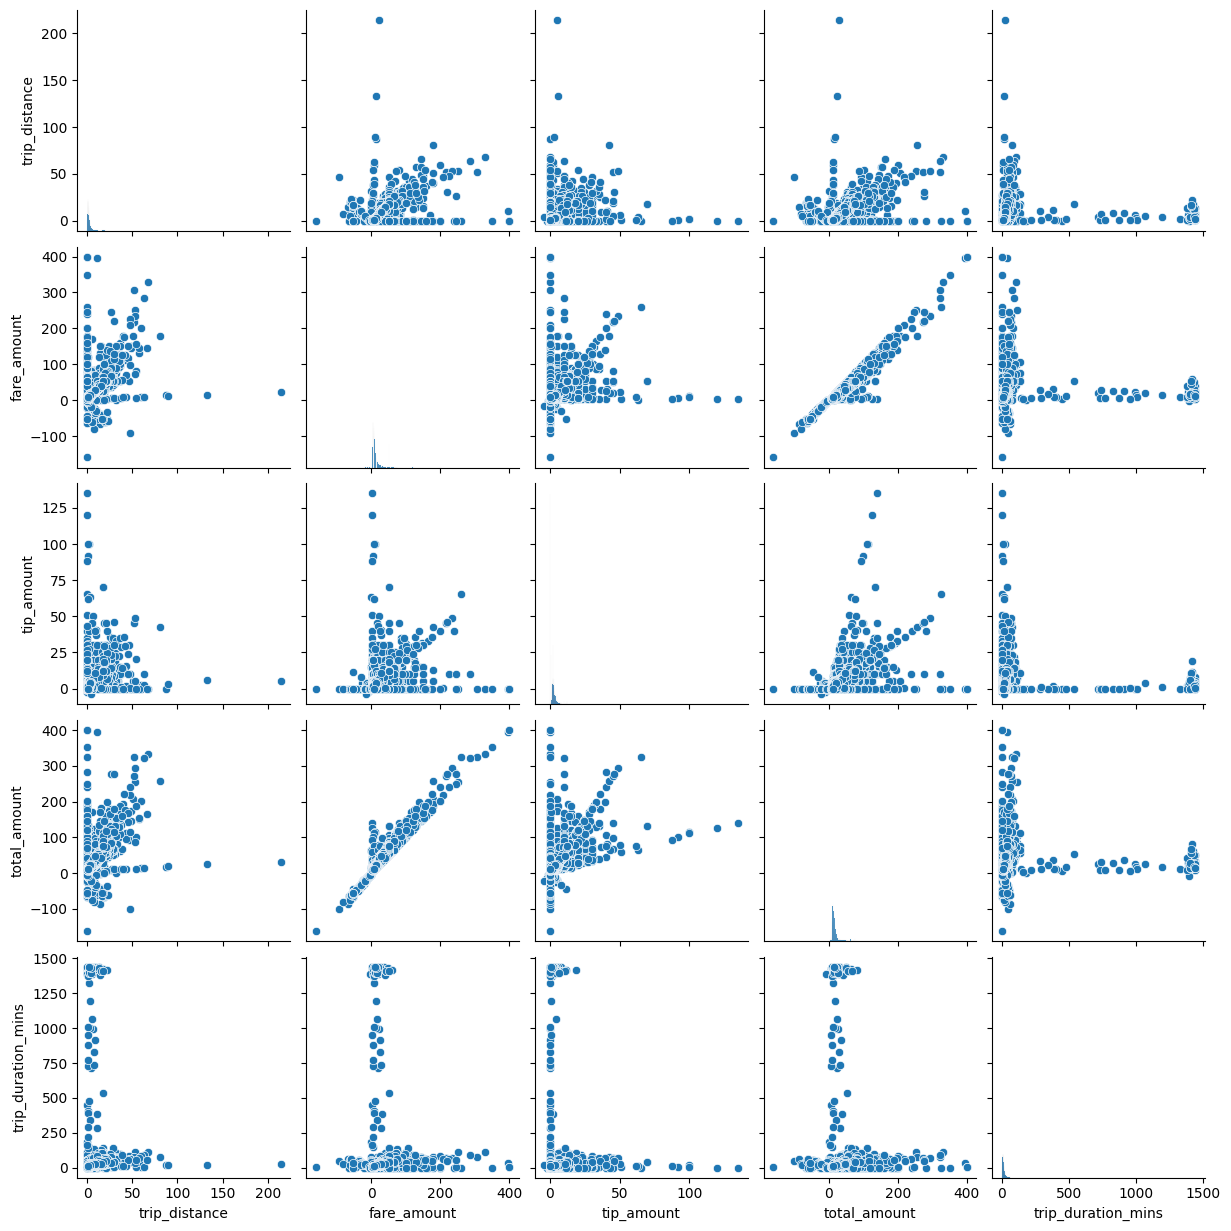

In [ ]:
# Create a scatter plot matrix of numerical variables. If memory issues try the df.sample method.
data_df = yellow_trip_df[['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration_mins']].sample(frac=0.05, replace=True, random_state=1)

sns.pairplot(data_df)

# trip_amount and fare_amount have strong relationship
# trip_duration and trip_distance have weak relationship

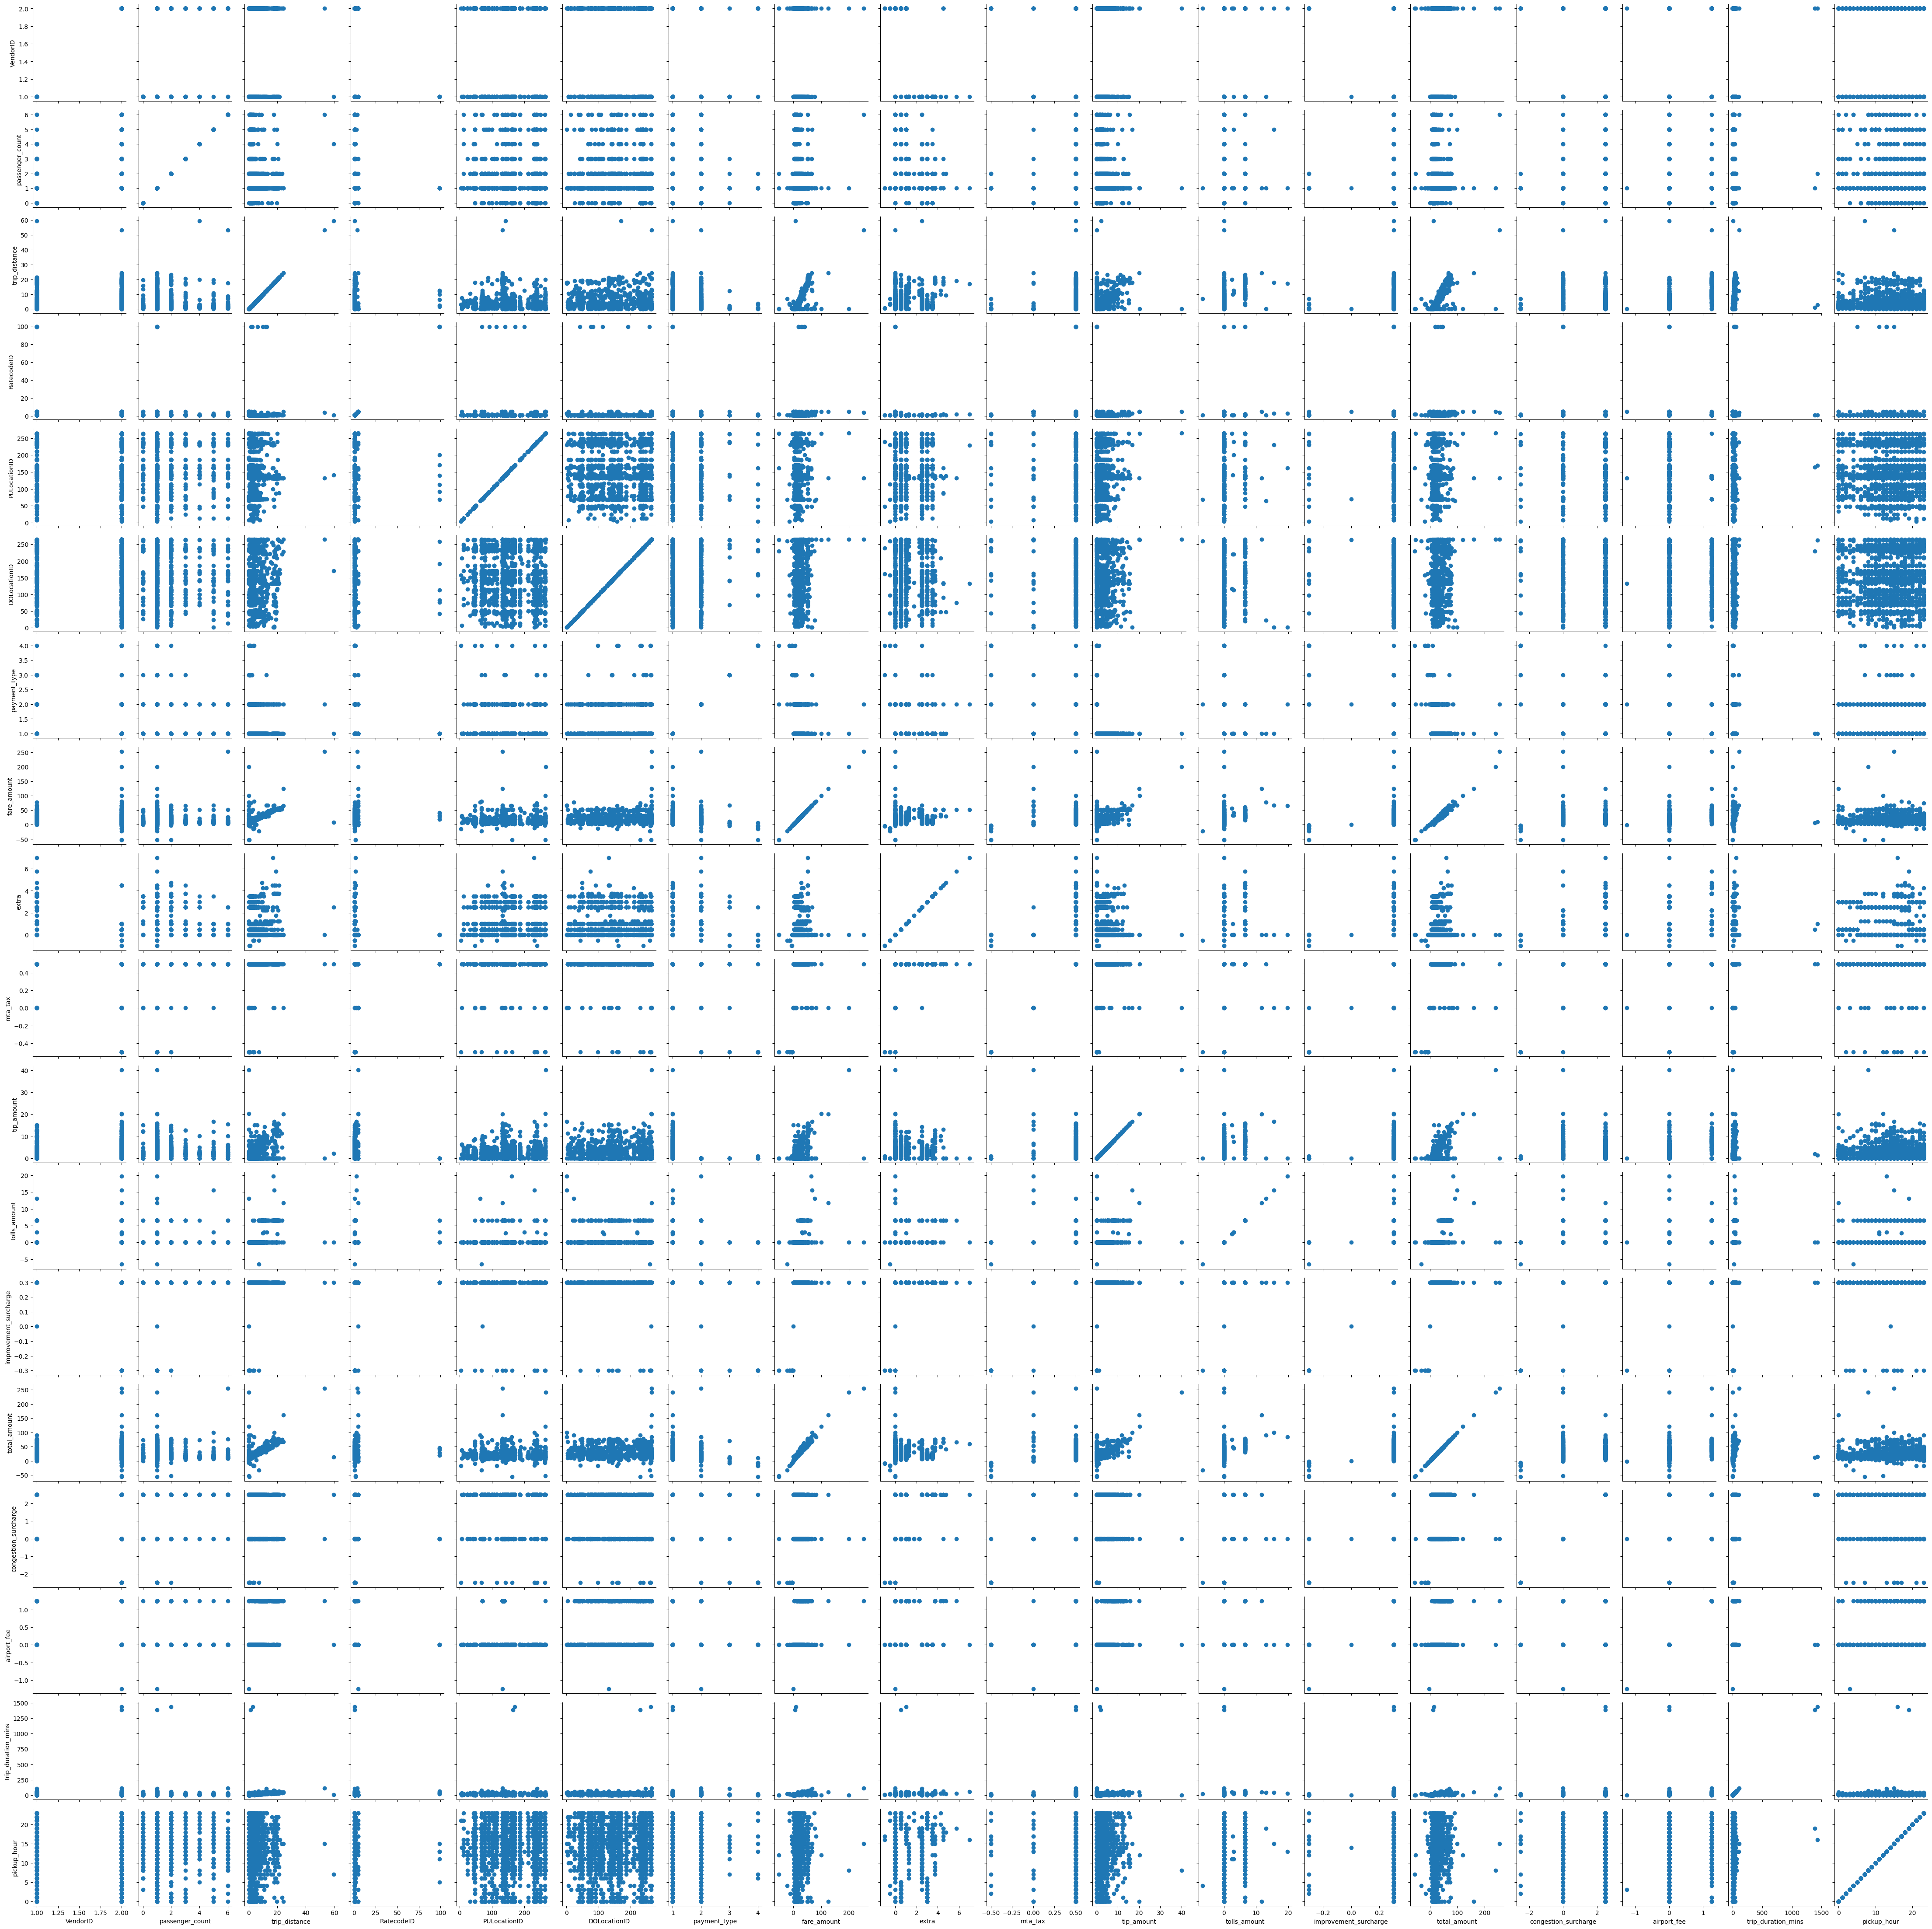

In [ ]:
# Create a scatter plot matrix of numerical variables. If memory issues try the df.sample method.

data_df = yellow_trip_df.select_dtypes(include=['number']).sample(frac=0.001, replace=True, random_state=1)
g = sns.PairGrid(data_df)
g.map(plt.scatter);

In [ ]:
# Create a Seaborn countplot for PULocationID and DOLocationID. Only plot the top 15 categories by value counts.
# Use Seaborn to create a countplot for the variables PULocationID, and DOLocationID. Keep only the top 15 pick-up and drop-off locations. What's the most popular pick-up location?

location_df = yellow_trip_df.groupby(['PULocationID', 'DOLocationID'])['PULocationID', 'DOLocationID']
location_counts = location_df.value_counts()[:15]
print(location_counts)
# pulocation_counts = yellow_trip_df[['PULocationID']].value_counts()

# location_counts = location_counts.head(15)
# print(location_counts.to_frame(name="count"))

# location_counts = location_counts.head(15).to_frame()

# location_counts = location_counts.melt(var_name='PULocationID', value_name='DOLocationID')
# print(location_counts)
print(location_counts.info())
# test_df = yellow_trip_df.groupby(['PULocationID', 'DOLocationID'])['PULocationID'].value_counts().head(15)
# print(test_df)

# sns.countplot(x ='PULocationID', hue="DOLocationID", data = location_counts, stat='count')


<ipython-input-54-3ac9e4f41783>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  location_df = yellow_trip_df.groupby(['PULocationID', 'DOLocationID'])['PULocationID', 'DOLocationID']


PULocationID  DOLocationID
1             1               309
              23                1
              45                1
              99                1
              158               1
              170               1
              186               1
              211               1
              223               1
              264              28
              265               2
2             161               1
              230               1
3             3                 3
              4                 1
dtype: int64
<class 'pandas.core.series.Series'>
MultiIndex: 15 entries, (1, 1) to (3, 4)
Series name: None
Non-Null Count  Dtype
--------------  -----
15 non-null     int64
dtypes: int64(1)
memory usage: 4.3 KB
None


TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

<Axes: xlabel='payment_type', ylabel='total_amount'>

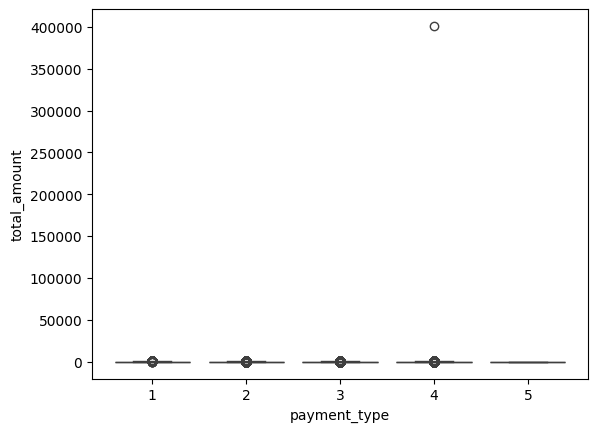

In [ ]:
# Create a box plot of total amount by payment type. Do you see anything odd?
sns.boxplot(x = 'payment_type', y = 'total_amount', data = yellow_trip_df, native_scale=True)
# We see a outlier for payment_type=4 out of the range and skewing the box plot

<Axes: xlabel='payment_type', ylabel='total_amount'>

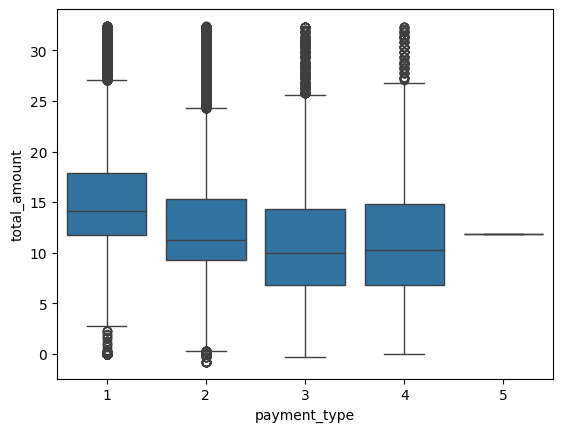

In [ ]:

# We can use Interquartile ranges and remove these outliers

Q1 = yellow_trip_df['total_amount'].quantile(0.25)
Q3 = yellow_trip_df['total_amount'].quantile(0.75)
IQR = Q3 - Q1

filter = (yellow_trip_df['total_amount'] >= Q1 - 1.5 * IQR) & (yellow_trip_df['total_amount'] <= Q3 + 1.5 *IQR)
data_df = yellow_trip_df.loc[filter]

sns.boxplot(x = 'payment_type', y = 'total_amount', data = data_df)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee',
       'trip_duration_mins', 'pickup_day_of_week', 'pickup_hour'],
      dtype='object')


<Axes: xlabel='fare_amount', ylabel='Count'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


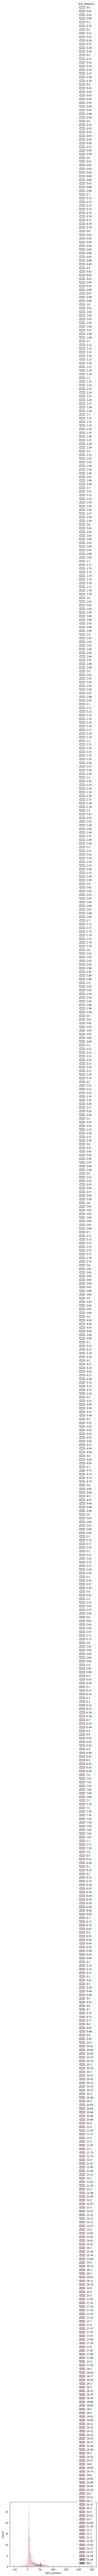

In [ ]:
# Explore data distributions for 'fare_amount', 'trip_distance' and 'extra' using Seaborn's histplot. Sample the data if you run into memory issues.
print(yellow_trip_df.columns)
data_df = yellow_trip_df[['fare_amount', 'trip_distance', 'extra']].sample(frac=0.001, replace=True, random_state=1)
sns.histplot(data=data_df, x="fare_amount", hue="trip_distance", kde=True)